## Name: 
### ISMT S-136 Time Series Analysis with Python   
### Extra Credit Assignemnt 2

## Problem 1 (5 points)

The goal of this problem is to learn how to run the augmented Dickey-Fuller (often abbreviated ADF) test in Python as well as build an intuition about the cases the test can/cannot be used to conclude on the stationarity of a time series. The ADF test is available in statsmodels.tsa.stattools - detailed documentation can be found at https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html

Please notice from the documentation that if xt is the time series, adfuller(xt)[1] returns the p-value.

In each case below, please simulate 200 observations of the time series $x_t$, plot it, indicate whether the time series is supposed to be stationary (from theoretical perspectives), present the p-value of the ADF test, and finally discuss the result of the ADF test:

(a) $x_t$ is AR(1) with $\phi_1=0.7$ and $\sigma_w^2=1$   
(b) $x_t$ is AR(1) with $\phi_1=1.01$ and $\sigma_w^2=1$   
(c) $x_t$ is AR(2) with $\phi_1=1.5$, $\phi_2=-0.7$, and $\sigma_w^2=1$     
(d) $x_t$ is AR(2) with $\phi_1=1$, $\phi_2=-1.1$, and $\sigma_w^2=1$        
(e) $x_t$ are independent normal random variables with $Var[x_t]=2.7^2$ for $t=1,2,\ldots,100$ and $Var[x_t]=0.3^2$ for $t=101,102,\ldots,200$

SOLUTION:

In [1]:
from statsmodels.tsa.stattools import adfuller

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt
from statsmodels.tsa.arima_model import ARIMA

import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import regularizers

import warnings
warnings.filterwarnings('ignore')

(a)

In [18]:
# AR(1) with phi_1 = 0.7
phi =   np.array([0.7])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
arma_process_AR = smt.ArmaProcess(ar, ma)

np.random.seed(123)
n = 200
xt = smt.arma_generate_sample(ar=ar, ma=ma, scale=sigma, nsample=n)

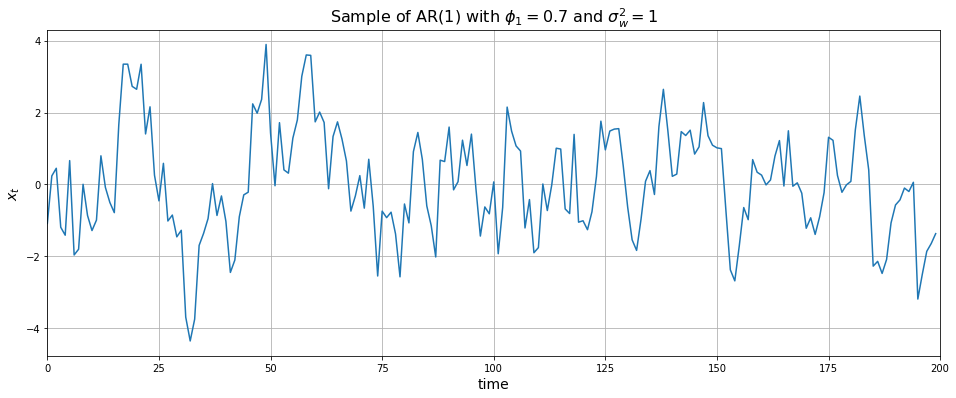

In [19]:
plt.figure(figsize=(16,6))
plt.plot(xt)
plt.xlabel('time', size = 14)
plt.ylabel('$x_t$', size = 14)
plt.title('Sample of AR(1) with $\phi_1=0.7$ and $\sigma_w^2=1$', size = 16)
plt.xlim(0, len(xt))
plt.grid(True)
plt.show()

Based on the time series plot and the stationarity requirements of constant/time-independent mean and variance over time, the AR(1) process with $\phi_1 = 0.7$ has a approximately constant mean (=0) over time and the variance seems to be higher in early time. Hence, weak stationarity can be slightly rejected.

In [4]:
print('p-value of Augmented Dicker Fuller Test:', adfuller(xt)[1])

p-value of Augmented Dicker Fuller Test: 5.759977473316851e-07


Assuming a confidence level of $0.05$ (often used in practice), the p-value of the Augmented Dickey-Fuller Test is below the prespecified confidence level which means that the null hypothesis, defined as the existence of a unit root, is recejected. Therefore, the time series $x_t$ does not include a unit root and the AR(1) process is causal.

(b)

In [5]:
# AR(1) with phi_1 = 1.1
phi =   np.array([1.1])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
arma_process_AR = smt.ArmaProcess(ar, ma)

np.random.seed(123)
n = 200
xt = smt.arma_generate_sample(ar=ar, ma=ma, scale=sigma, nsample=n)

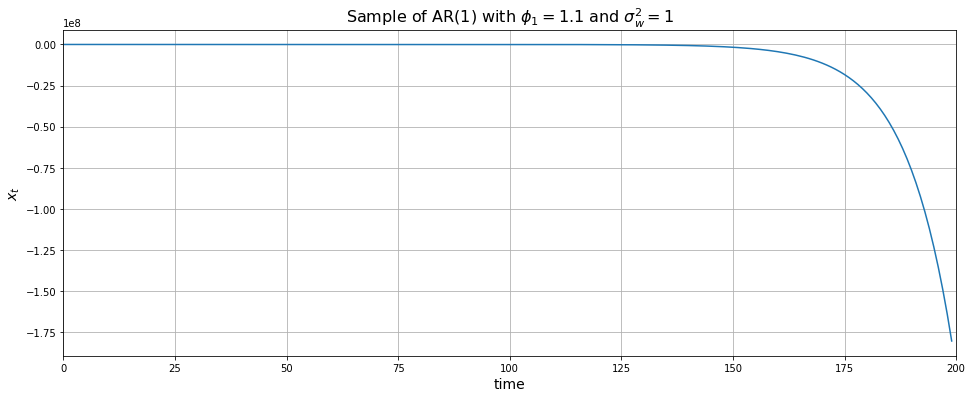

In [6]:
plt.figure(figsize=(16,6))
plt.plot(xt)
plt.xlabel('time', size = 14)
plt.ylabel('$x_t$', size = 14)
plt.title('Sample of AR(1) with $\phi_1=1.1$ and $\sigma_w^2=1$', size = 16)
plt.xlim(0, len(xt))
plt.grid(True)
plt.show()

Based on the time series plot and the stationarity requirements of constant/time-independent mean and variance over time, the AR(1) process with $\phi_1 = 1.1$ is not stationary as the stationarity requirements are not fulfilled.

In [7]:
print('p-value of Augmented Dicker Fuller Test:', adfuller(xt)[1])

p-value of Augmented Dicker Fuller Test: 1.0


Assuming a confidence level of $0.05$ (often used in practice), the p-value of the Augmented Dickey-Fuller Test is 1 and therefore above the prespecified confidence level which means that the null hypothesis, defined as the existence of a unit root, is fully confirmed. Therefore, the time series $x_t$ does include a unit root and the AR(1) process is not causal.

(c)

In [8]:
# AR(2) with phi_1 = 1.5 and phi_2 = -0.7
phi =   np.array([1.5, -0.7])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
arma_process_AR = smt.ArmaProcess(ar, ma)

np.random.seed(123)
n = 200
xt = smt.arma_generate_sample(ar=ar, ma=ma, scale=sigma, nsample=n)

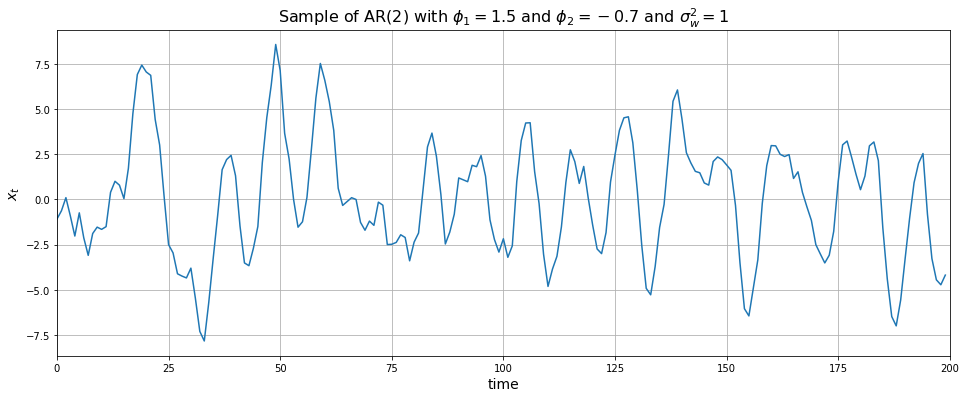

In [9]:
plt.figure(figsize=(16,6))
plt.plot(xt)
plt.xlabel('time', size = 14)
plt.ylabel('$x_t$', size = 14)
plt.title('Sample of AR(2) with $\phi_1=1.5$ and $\phi_2 = -0.7$ and $\sigma_w^2=1$', size = 16)
plt.xlim(0, len(xt))
plt.grid(True)
plt.show()

Based on the time series plot and the stationarity requirements of constant/time-independent mean and variance over time, the AR(2) process with $\phi_1 = 1.5$ and $\phi_2 = -0.7$ has a approximately constant mean (=0) over time and the variance also seems to be approximately constant over time. Hence, weak stationarity can be confirmed.

In [10]:
print('p-value of Augmented Dicker Fuller Test:', adfuller(xt)[1])

p-value of Augmented Dicker Fuller Test: 1.2234679053474417e-14


Assuming a confidence level of $0.05$ (often used in practice), the p-value of the Augmented Dickey-Fuller Test is below the prespecified confidence level which means that the null hypothesis, defined as the existence of a unit root, is rejected. Therefore, the time series $x_t$ does not include a unit root and the AR(2) process is causal.

(d)

In [11]:
# AR(2) with phi_1 = 1 and phi_2 = -1.1
phi =   np.array([1, -1.1])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
arma_process_AR = smt.ArmaProcess(ar, ma)

np.random.seed(123)
n = 200
xt = smt.arma_generate_sample(ar=ar, ma=ma, scale=sigma, nsample=n)

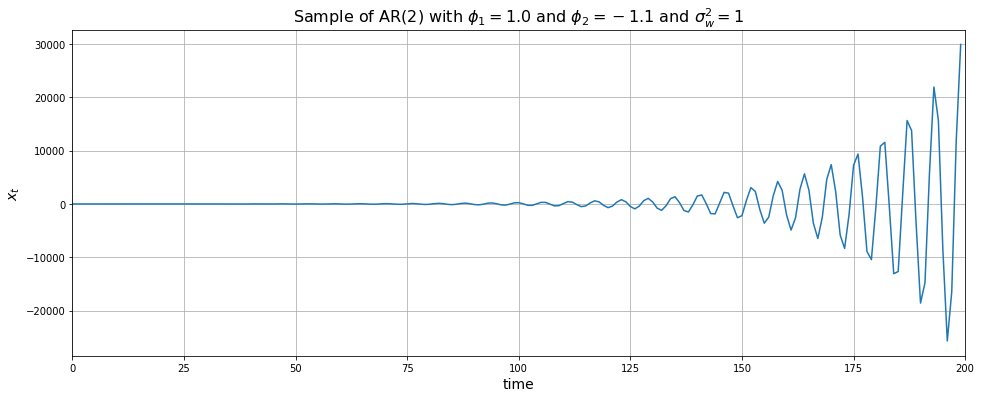

In [12]:
plt.figure(figsize=(16,6))
plt.plot(xt)
plt.xlabel('time', size = 14)
plt.ylabel('$x_t$', size = 14)
plt.title('Sample of AR(2) with $\phi_1=1.0$ and $\phi_2 = -1.1$ and $\sigma_w^2=1$', size = 16)
plt.xlim(0, len(xt))
plt.grid(True)
plt.show()

Based on the time series plot and the stationarity requirements of constant/time-independent mean and variance over time, the AR(2) process with $\phi_1 = 1$ and $\phi_2 = -1.1$ has a constant mean (=0) over time, but the variance increases over time. Hence, weak stationarity can be rejected.

In [14]:
print('p-value of Augmented Dicker Fuller Test:', adfuller(xt)[1])

p-value of Augmented Dicker Fuller Test: 0.0


Assuming a confidence level of $0.05$ (often used in practice), the p-value of the Augmented Dickey-Fuller Test is 0 and therefore below the prespecified confidence level which means that the null hypothesis, defined as the existence of a unit root, is rejected. Therefore, the time series $x_t$ does not include a unit root and the AR(2) process is causal.

(e)

In [15]:
sd_xt_1 = 2.7
sd_xt_2 = 0.3
xt_1 = np.random.normal(loc = 0, scale = sd_xt_1, size = 100)
xt_2 = np.random.normal(loc = 0, scale = sd_xt_2, size = 100)
xt = np.concatenate((xt_1, xt_2), axis = 0)

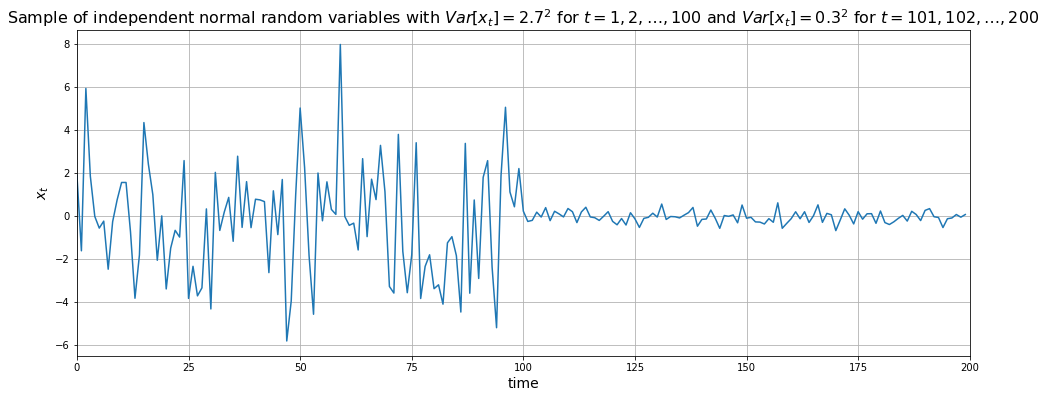

In [16]:
plt.figure(figsize=(16,6))
plt.plot(xt)
plt.xlabel('time', size = 14)
plt.ylabel('$x_t$', size = 14)
plt.title('Sample of independent normal random variables with $Var[x_t]=2.7^2$ for $t=1,2,\ldots,100$ and $Var[x_t]=0.3^2$ for $t=101,102,\ldots,200$', size = 16)
plt.xlim(0, len(xt))
plt.grid(True)
plt.show()

Based on the time series plot and the stationarity requirements of constant/time-independent mean and variance over time, the process consisting of two different underlying distributions with $Var_1(x_t) = 2.7^2$ and $Var_2(x_t) = 0.3^2$ has a constant mean (=0) over time, but the variance decreases over time. Hence, weak stationarity can be rejected.

In [17]:
print('p-value of Augmented Dicker Fuller Test:', adfuller(xt)[1])

p-value of Augmented Dicker Fuller Test: 0.0006124549037476527


Assuming a confidence level of $0.05$ (often used in practice), the p-value of the Augmented Dickey-Fuller Test is below the prespecified confidence level which means that the null hypothesis, defined as the existence of a unit root, is rejected. Therefore, the time series $x_t$ does not include a unit root and the process is causal.

## Problem 2 (5 points)

Please pick causal AR(1), 
$$x_t = \phi \,x_{t-1} +w_t,  ~\text{ where }~  w_t \overset{\text{iid}}{\sim}\mathcal{N}(0,\sigma_w^2),$$   

of your choice. Generate the time series $x_t$ of $n=20,000$ observations. Then   

(a) Fit the AR(1) model to the time series data $x_1,\ldots,x_n$.

(b) Model $E[x_t|x_{t-1},x_{t-2},\ldots]$ with a fully connected Neural Network which has one input $x_{t-1}$ and also two hidden layers. The output is $x_{t}$. In order to make sure we do not overfit data, we need to split the time series first into train and test parts. Please feel free to pick any number of neurons and any activation functions, but do not forget to scale the time series before fitting. Ideally, we want to come up with a Neural Network which provides the smallest test MSE (i.e. validation error, the error we compute on the test set). Please try a few examples to get a feeling how the result depends on these choices you make. You do not need to describe/present all models you tried - please just report one example. It does not have to be the most optimal one because fitting multiple models takes considerable amount of time - just try your best so you get a good sense of it.

(c) For both models AR and NN you trained in (1) and (2) compute 1-step ahead predictions for values $x_{1},...,x_n$ as well as for m=10 new values $x_{n+1},\ldots,x_{n+m}$. Plot the results for $t \in \{20000-100,20000+m\}$. Make sure to label/color the cases.

SOLUTION:

(a)

In [2]:
# AR(1) with phi_1 = 0.5

phi =   np.array([0.5])
theta = np.array([0.])
         
ar = np.r_[1, -phi]
ma = np.r_[1, theta]
sigma = 1    
arma_process_AR = smt.ArmaProcess(ar, ma)

np.random.seed(123)
n = 20000
xt = smt.arma_generate_sample(ar=ar, ma=ma, scale=sigma, nsample=n)

In [3]:
p = 1
model_AR = ARIMA(xt, order = (p, 0, 0))
model_fit_AR = model_AR.fit(method = 'css')
print(model_fit_AR.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                20000
Model:                     ARMA(1, 0)   Log Likelihood              -28381.375
Method:                           css   S.D. of innovations              1.000
Date:                Sat, 31 Jul 2021   AIC                          56768.750
Time:                        13:49:25   BIC                          56792.460
Sample:                             1   HQIC                         56776.507
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0202      0.015      1.388      0.165      -0.008       0.049
ar.L1.y        0.5139      0.006     84.721      0.000       0.502       0.526
                                    Roots           

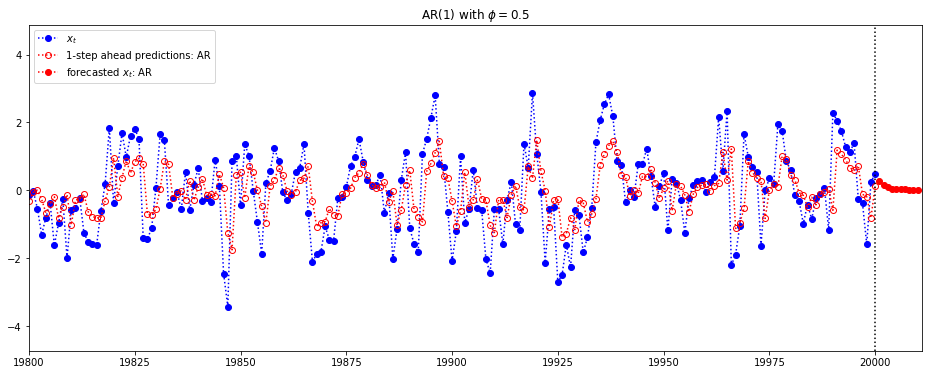

In [4]:
# check n fitted values
xt_fitted_AR = model_fit_AR.predict()
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(p+1,n+1),xt_fitted_AR,linestyle=':', marker='o', mfc='none', color='red',label = "1-step ahead predictions: AR")

# forecast m steps ahead starting from n+1
m=10
xt_forecasted_AR = model_fit_AR.predict(start=n+1, end=n+m-1)
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted_AR, linestyle=':', marker='o',color='red',label = "forecasted $x_t$: AR")
plt.title("AR(1) with $\phi = $" + str(phi[0]))
plt.legend()
plt.xlim(n-200,n+m+1)
plt.show()

(b)

In [5]:
# Rescaling
xt_min = min(xt)
xt_max = max(xt)
xt = (xt-xt_min)/(xt_max-xt_min)

In [6]:
xt = pd.Series(xt)
data = pd.concat([xt.shift(1), xt], axis=1)
data.columns = ['x(t-1)', 'x(t)']
display(data.head())

,x(t-1),x(t)
0,NaN,0.366918
1,0.366918,0.543271
2,0.543271,0.549650
3,0.549650,0.347962
4,0.347962,0.353342


In [7]:
# Train Test Split
n_train = int(n * 0.80)
n_test = n - n_train

train, test = data.iloc[0:n_train,:], data.iloc[n_train:n,:]

train = train.dropna(inplace=False)

p = data.shape[1]-1
X_train, y_train = train.iloc[:,0:p], train.iloc[:,p]
X_test, y_test = test.iloc[:,0:p], test.iloc[:,p]

In [8]:
p = X_train.shape[1]
model_NN = models.Sequential()
model_NN.add(layers.Dense(16, activation = 'relu', input_shape = (p,)))
model_NN.add(layers.Dense(2, activation = 'relu'))
model_NN.add(layers.Dense(1, activation = 'linear')) 

model_NN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 34        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________


In [9]:
nepochs = 600
model_NN.compile(optimizer = 'adam', loss = 'mse')
history = model_NN.fit(X_train, y_train,
          epochs=nepochs,
          batch_size = 2000,
          shuffle = False,
          validation_data = (X_test, y_test))

history_dict = history.history

Epoch 1/600
8/8 [==============================] - 1s 80ms/step - loss: 0.2620 - val_loss: 0.2495
Epoch 2/600
8/8 [==============================] - 0s 5ms/step - loss: 0.2514 - val_loss: 0.2419
Epoch 3/600
8/8 [==============================] - 0s 6ms/step - loss: 0.2438 - val_loss: 0.2345
Epoch 4/600
8/8 [==============================] - 0s 6ms/step - loss: 0.2363 - val_loss: 0.2270
Epoch 5/600
8/8 [==============================] - 0s 6ms/step - loss: 0.2274 - val_loss: 0.1969
Epoch 6/600
8/8 [==============================] - 0s 6ms/step - loss: 0.1834 - val_loss: 0.1291
Epoch 7/600
8/8 [==============================] - 0s 5ms/step - loss: 0.1167 - val_loss: 0.0745
Epoch 8/600
8/8 [==============================] - 0s 6ms/step - loss: 0.0662 - val_loss: 0.0401
Epoch 9/600
8/8 [==============================] - 0s 6ms/step - loss: 0.0355 - val_loss: 0.0224
Epoch 10/600
8/8 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.0155
Epoch 11/600
8/8 [==========

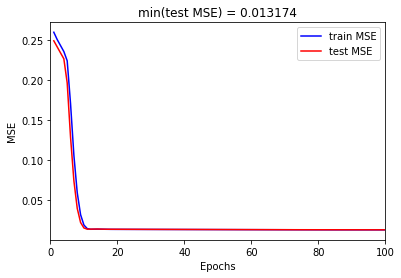

In [10]:
plt.clf()
train_mse = history_dict['loss']
test_mse = history_dict['val_loss']

plt.plot(range(1, nepochs + 1), train_mse, 'b', label = 'train MSE', color = "blue")
plt.plot(range(1, nepochs + 1), test_mse, 'b', label = 'test MSE', color = "red")

plt.title('min(test MSE) = ' + str(round(min(test_mse),6)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.xlim(0, 100)
plt.show()

Based on the plot (which was created with 100 epochs), the minimizing MSE are 4 epochs. As the error does not increase with increasing epochs, the setting of 600 epochs can be left as it is configured.

(c)

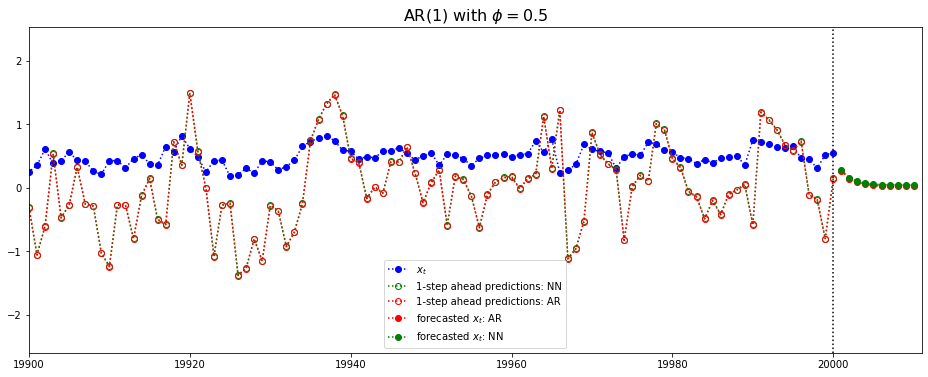

In [17]:
# check n fitted values
xt_fitted_AR = model_fit_AR.predict()
xt_fitted_NN = model_NN.predict(data.iloc[:, 0:1])
xt_fitted_NN = xt_min + xt_fitted_NN*(xt_max-xt_min)
plt.figure(figsize=(16,6))
plt.plot(range(1,n+1),xt,linestyle=':', marker='o',color='blue',label = "$x_t$")
plt.plot(range(1,n+1),xt_fitted_NN,linestyle=':', marker='o', mfc='none', color='green',label = "1-step ahead predictions: NN")
plt.plot(range(p+1,n+1),xt_fitted_AR,linestyle=':', marker='o', mfc='none', color='red',label = "1-step ahead predictions: AR")

# forecast m steps ahead starting from n+1
m=10
xt_forecasted_AR = model_fit_AR.predict(start=n+1, end=n+m-1)
xt_forecasted_NN = np.empty(m+p)
xt_forecasted_NN[0:p] = xt[(n-p):n] 
for t in range(p,m+p):
    xt_forecasted_NN[t] = model_NN.predict([xt_forecasted_NN[t-1]])
xt_forecasted_NN = xt_forecasted_NN[p:(n+p)]
xt_forecasted_NN = xt_min + xt_forecasted_NN*(xt_max-xt_min)
plt.axvline(x=n,linestyle=':',color='k')
plt.plot(range(n+1,n+m+1), xt_forecasted_AR, linestyle=':', marker='o',color='red',label = "forecasted $x_t$: AR")
plt.plot(range(n+1,n+m+1), xt_forecasted_NN, linestyle=':', marker='o',color='green',label = "forecasted $x_t$: NN")
plt.title("AR(1) with $\phi = $" + str(phi[0]), size = 16)
plt.legend()
plt.xlim(n-100,n+m+1)
plt.show()